In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [289]:
df = pd.read_csv('NYC_Restaurants.csv', dtype=str)
df.iloc[0]

Unnamed: 0                                                               0
CAMIS                                                             30112340
DBA                                                                WENDY'S
BORO                                                              BROOKLYN
BUILDING                                                               469
STREET                                                     FLATBUSH AVENUE
ZIPCODE                                                              11225
PHONE                                                           7182875005
CUISINE DESCRIPTION                                             Hamburgers
INSPECTION DATE                                                 12/30/2014
ACTION                     Violations were cited in the following area(s).
VIOLATION CODE                                                         06C
VIOLATION DESCRIPTION    Food not protected from potential source of co...
CRITICAL FLAG            

### [Q1, 6 points] Create a unique name for each restaurant

In [313]:
df['RESTAURANT'] = df['DBA']+ ' ' + df['BUILDING']+ ' ' + df['STREET']+ ' ' + df['ZIPCODE']+ ' ' + df['BORO'] 
df.loc[:10]

,Unnamed: 0,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,RESTAURANT
0,0,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
1,1,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
2,2,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,Violations were cited in the following area(s).,04H,"Raw, cooked or prepared food is adulterated, c...",Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
3,3,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,Violations were cited in the following area(s).,06A,Personal cleanliness inadequate. Outer garment...,Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
4,4,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
5,5,40356068,TOV KOSHER KITCHEN,QUEENS,97-22,63 ROAD,11374,7188967788,Jewish/Kosher,11/24/2014,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140º F.,Critical,20,Z,11/24/2014,02/12/2015,Cycle Inspection / Re-inspection,TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
6,6,40356068,TOV KOSHER KITCHEN,QUEENS,97-22,63 ROAD,11374,7188967788,Jewish/Kosher,11/24/2014,Violations were cited in the following area(s).,06A,Personal cleanliness inadequate. Outer garment...,Critical,20,Z,11/24/2014,02/12/2015,Cycle Inspection / Re-inspection,TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
7,7,40356068,TOV KOSHER KITCHEN,QUEENS,97-22,63 ROAD,11374,7188967788,Jewish/Kosher,11/24/2014,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,20,Z,11/24/2014,02/12/2015,Cycle Inspection / Re-inspection,TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
8,8,40356068,TOV KOSHER KITCHEN,QUEENS,97-22,63 ROAD,11374,7188967788,Jewish/Kosher,11/24/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,20,Z,11/24/2014,02/12/2015,Cycle Inspection / Re-inspection,TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
9,9,40356151,BRUNOS ON THE BOULEVARD,QUEENS,8825,ASTORIA BOULEVARD,11369,7183350505,American,11/15/2014,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,38,Z,11/15/2014,02/12/2015,Cycle Inspection / Re-inspection,BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...


### [Q2, 6 points] How many restaurants are included in the data?

In [291]:
len(df['RESTAURANT'].drop_duplicates())

10114

### [Q3, 6 points] How many chains are there?

In [292]:
mask = df[['DBA','RESTAURANT']].drop_duplicates()['DBA'].value_counts() > 1
resturaunts = df[['DBA','RESTAURANT']].drop_duplicates()['DBA'].value_counts()
chains = resturaunts[mask]
len(chains)

368

### [Q4, 6 points] Plot a bar graph of the top 20 most popular chains.

<AxesSubplot:>

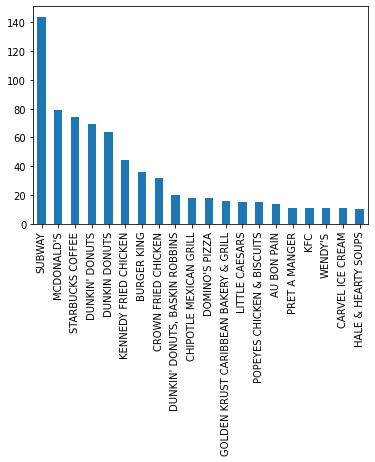

In [293]:
chains.iloc[:20].plot(kind = 'bar')

### [Q5, 6 points] What fraction of all restaurants are chain restaurants?

In [294]:
sum(chains) / sum(resturaunts)

0.16472216729286138

### [Q6, 6 points] Plot the number of non-chain restaurants in each boro

<AxesSubplot:>

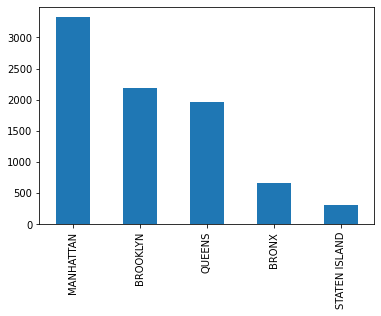

In [296]:
mask = (df[['DBA','RESTAURANT']].drop_duplicates()['DBA'].value_counts() == 1)

non_chains = df[['DBA','RESTAURANT']].drop_duplicates()['DBA'].value_counts()[mask]

mask = (df['BORO'] == 'Missing')
df.loc[mask, 'BORO'] = np.nan

non_duplicates = df[['DBA','RESTAURANT', 'BORO', 'CUISINE DESCRIPTION']].drop_duplicates()


non_duplicates[non_duplicates['DBA'].isin(non_chains.keys())]['BORO'].value_counts().plot(kind = 'bar')

### [Q7, 8 points] Plot the fraction of non-chain restaurants in each boro.

<AxesSubplot:>

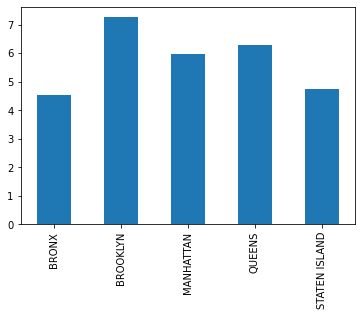

In [297]:
(df[df['DBA'].isin(non_chains.keys())]['BORO'].value_counts() / df[~df['DBA'].isin(non_chains.keys())]['BORO'].value_counts()).plot(kind = 'bar')

### [Q8, 6 points] Plot the popularity of cuisines.

<AxesSubplot:>

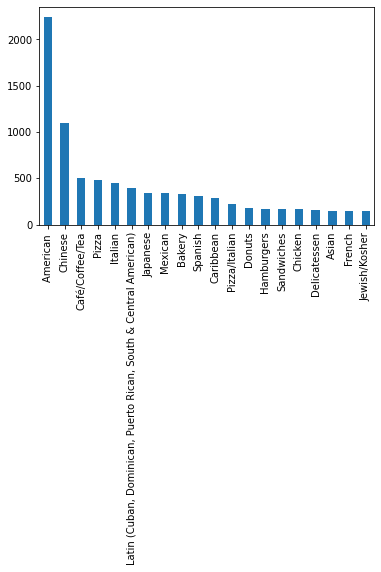

In [305]:
df[['CUISINE DESCRIPTION','RESTAURANT']].drop_duplicates()['CUISINE DESCRIPTION'].value_counts()[:20].plot(kind = 'bar')

### [Q9, 9 points] Plot the cuisines among restaurants which never got cited for violations.

<AxesSubplot:>

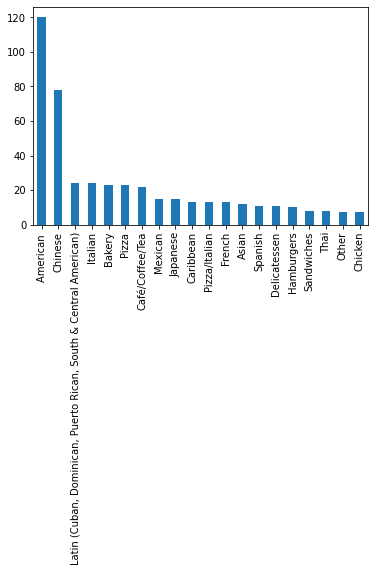

In [310]:
clean_mask = df[['CUISINE DESCRIPTION','RESTAURANT', 'VIOLATION CODE']].drop_duplicates()['VIOLATION CODE'].isnull()
df[['CUISINE DESCRIPTION','RESTAURANT', 'VIOLATION CODE']].drop_duplicates()[clean_mask]['CUISINE DESCRIPTION'].value_counts()[:20].plot(kind = 'bar')

### [Q10, 6 points] What cuisines tend to be the “cleanest”?

In [173]:
mask = (df[['CUISINE DESCRIPTION','RESTAURANT']].drop_duplicates()['CUISINE DESCRIPTION'].value_counts() >20)
big_cuisines = df[['CUISINE DESCRIPTION','RESTAURANT']].drop_duplicates()['CUISINE DESCRIPTION'].value_counts()[mask]

top_20 = big_cuisines.keys()

mask = df[df['CUISINE DESCRIPTION'].isin(top_20)].drop_duplicates()['VIOLATION CODE'].isnull()
clean_rest = df[df['CUISINE DESCRIPTION'].isin(top_20)].drop_duplicates()[mask]['CUISINE DESCRIPTION'].value_counts().reindex(top_20, fill_value=0)

total_rest = df[df['CUISINE DESCRIPTION'].isin(top_20)].drop_duplicates()['CUISINE DESCRIPTION'].value_counts().reindex(top_20, fill_value=0)

ratios = clean_rest / total_rest

ratios.sort_values(ascending = False)[:10]

Barbecue              0.031250
Soups & Sandwiches    0.030769
Continental           0.028986
Other                 0.025547
Peruvian              0.023256
Russian               0.022857
French                0.021667
Soul Food             0.019231
Tex-Mex               0.018382
Turkish               0.017143
Name: CUISINE DESCRIPTION, dtype: float64

### [Q11, 8 points] What are the most common violations in each borough?

In [311]:
table = pd.crosstab(index = df['VIOLATION DESCRIPTION'], columns = df['BORO'])
table.idxmax()

BORO
BRONX            Non-food contact surface improperly constructe...
BROOKLYN         Non-food contact surface improperly constructe...
MANHATTAN        Non-food contact surface improperly constructe...
QUEENS           Non-food contact surface improperly constructe...
STATEN ISLAND    Non-food contact surface improperly constructe...
dtype: object

### [Q12, 9 points] What are the most common violations per borough, after normalizing for the relative abundance of each violation? 

In [312]:
violationFrequency = df['VIOLATION DESCRIPTION'].value_counts()
norm_table = pd.crosstab(index = df['VIOLATION DESCRIPTION'], columns = df['BORO'], normalize = 'index')
norm_table.idxmax()

BORO
BRONX                                  Unprotected food re-served.
BROOKLYN         Precooked potentially hazardous food from comm...
MANHATTAN        Out-of package sale of tobacco products observed.
QUEENS           Caloric content range (minimum to maximum) not...
STATEN ISLAND    Eggs found dirty/cracked; liquid, frozen or po...
dtype: object

### [Q13, 8 points] How many phone area codes correspond to a single zipcode? 

In [195]:
df['AREA CODE'] = df['PHONE'].str[:3]
mask = (df[['AREA CODE', 'ZIPCODE']].drop_duplicates()['AREA CODE'].value_counts() == 1)
len(df[['AREA CODE', 'ZIPCODE']].drop_duplicates()['AREA CODE'].value_counts()[mask])

34

### [Q14, 10 points] Find common misspellings of street names

In [271]:
def get_type(street):
    return street.split()[-1]
df['STREET TYPE'] = df['STREET'].apply(get_type)

def get_base(street):
    return ' '.join(street.split()[:-1])
df['STREET BASE'] = df['STREET'].apply(get_base)

df['STREET BASE & ZIP'] = df['STREET BASE'].astype(str) + ' ' + df['ZIPCODE'].astype(str)

merged = df.merge(df, left_on = 'STREET BASE & ZIP', right_on = 'STREET BASE & ZIP', suffixes = ['-1', '-2'])

merged = merged[['STREET BASE & ZIP', 'STREET TYPE-2', 'STREET TYPE-1']].drop_duplicates()

In [274]:
mask = merged['STREET TYPE-2'] != merged['STREET TYPE-1']
street_types = merged[mask][['STREET TYPE-2', 'STREET TYPE-1']]

table = pd.crosstab(index = street_types['STREET TYPE-2'], columns = street_types['STREET TYPE-1'])

table[['AVE', 'ST', 'RD', 'BOULEARD', 'BULEVARD']].idxmax()

STREET TYPE-1
AVE         AVENUE
ST          STREET
RD            ROAD
BOULEARD      BLVD
BULEVARD      BLVD
dtype: object

AVE and AVENUE are used for the same street 163 times